# Setup

In [1]:
import glob
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import xml.etree.ElementTree as ET
from random import randint
import random
from sklearn.cluster import KMeans

In [2]:
def file_lines_to_list(path):
    # open txt file lines to a list
    with open(path) as f:
        content = f.readlines()
    # remove whitespace characters like `\n` at the end of each line
    content = [(x.strip()).split() for x in content]
    return content

In [3]:
def get_file_name(path):
    basename = os.path.basename(path)
    onlyname = os.path.splitext(basename)[0]
    return onlyname

# Outliers Remove ver1

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from random import randint

In [12]:
contents = file_lines_to_list("./yolo-various-size/60-70/bdd100k_person_60_70_train.txt")
print(len(contents))

1762


In [7]:
def rgb_display(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

405
/home/mju-hpc-02/Leanh/mobilenet-ssd/bdd100k/bdd100k/images/100k/train/28c472d9-495cd570.jpg 28c472d9-495cd570


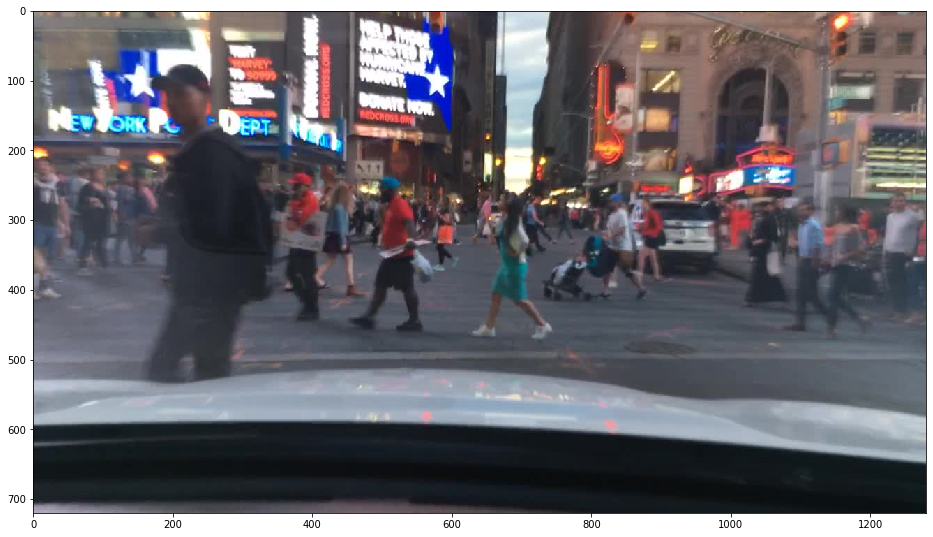

In [10]:
index = randint(0, len(contents)-1)
print(index)
content = contents[index]
path = content[0]
name = get_file_name(path)
print(path, name)

img = cv2.imread(f"../datasets/bdd100k/bdd100k/bdd100k/images/100k/train/{name}.jpg")
plt.figure(figsize=(16,10))
plt.imshow(rgb_display(img))
plt.show()

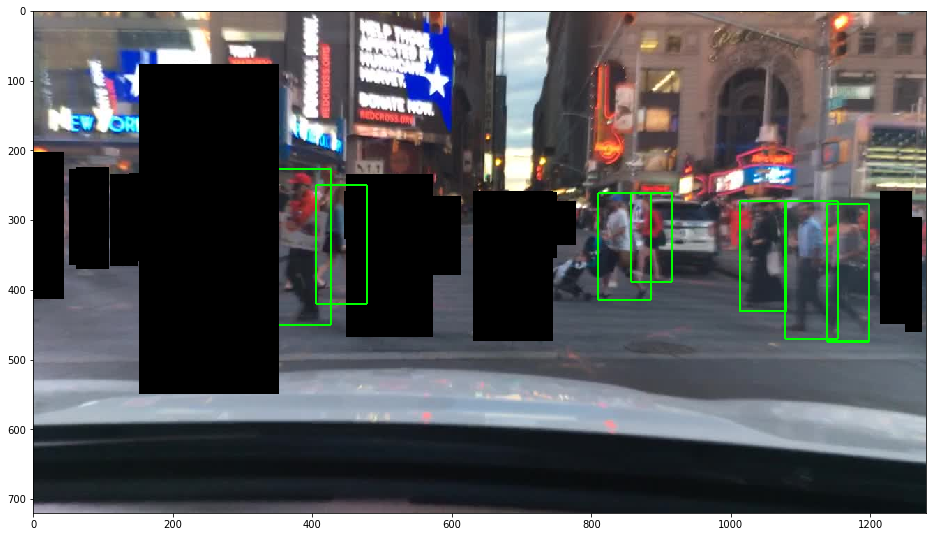

In [11]:
xml_path = f"../datasets/bdd100k/xml/train/{name}.xml"

person_boxes = []

with open(xml_path, "r") as new_f:
    root = ET.parse(xml_path).getroot()
    for obj in root.findall('object'):
        obj_name = obj.find('name').text
        if obj_name == "person":

            bndbox = obj.find('bndbox')
            left = bndbox.find('xmin').text
            top = bndbox.find('ymin').text
            right = bndbox.find('xmax').text
            bottom = bndbox.find('ymax').text

            person_boxes.append(["person", left, top, right, bottom])

dummy = img.copy()

for box in person_boxes:
    if int(box[3])-int(box[1]) >= 50 and int(box[3])-int(box[1]) <= 80 and int(box[4])-int(box[2]) <= 286:
        cv2.rectangle(dummy, (int(box[1]), int(box[2])), (int(box[3]), int(box[4])), (0, 255, 0), 2)

    else:
        cv2.rectangle(dummy, (int(box[1]), int(box[2])), (int(box[3]), int(box[4])), (0, 0, 0), -1)
        
plt.figure(figsize=(16,10))
plt.imshow(rgb_display(dummy))
plt.show()

# Fiding No Person Images

In [13]:
full_train = file_lines_to_list("./yolo-various-size/bdd_train.txt")
print(len(full_train))

69863


In [15]:
obj_count=0
i=0
img_cnt = 0

# Create and write out a text file:
text_file = open("./yolo-various-size/60-70-enhanced/no_person_img_names.txt", "w+")

for content in full_train:
    path = content[0]
    name = get_file_name(path)

    xml_path = f"../datasets/bdd100k/xml/train/{name}.xml"

    person_boxes = []
    person_cnt = 0

    with open(xml_path, "r") as new_f:
        root = ET.parse(xml_path).getroot()
        for obj in root.findall('object'):
            obj_name = obj.find('name').text
            if obj_name == "person": person_cnt+=1

    if person_cnt == 0: 
        print(name, file=text_file) 
        img_cnt+=1
          
    i+=1
    print(i, f"/ 1000")
    
    if img_cnt == 1000: break
    
text_file.close()

1 / 1000
2 / 1000
3 / 1000
4 / 1000
5 / 1000
6 / 1000
7 / 1000
8 / 1000
9 / 1000
10 / 1000
11 / 1000
12 / 1000
13 / 1000
14 / 1000
15 / 1000
16 / 1000
17 / 1000
18 / 1000
19 / 1000
20 / 1000
21 / 1000
22 / 1000
23 / 1000
24 / 1000
25 / 1000
26 / 1000
27 / 1000
28 / 1000
29 / 1000
30 / 1000
31 / 1000
32 / 1000
33 / 1000
34 / 1000
35 / 1000
36 / 1000
37 / 1000
38 / 1000
39 / 1000
40 / 1000
41 / 1000
42 / 1000
43 / 1000
44 / 1000
45 / 1000
46 / 1000
47 / 1000
48 / 1000
49 / 1000
50 / 1000
51 / 1000
52 / 1000
53 / 1000
54 / 1000
55 / 1000
56 / 1000
57 / 1000
58 / 1000
59 / 1000
60 / 1000
61 / 1000
62 / 1000
63 / 1000
64 / 1000
65 / 1000
66 / 1000
67 / 1000
68 / 1000
69 / 1000
70 / 1000
71 / 1000
72 / 1000
73 / 1000
74 / 1000
75 / 1000
76 / 1000
77 / 1000
78 / 1000
79 / 1000
80 / 1000
81 / 1000
82 / 1000
83 / 1000
84 / 1000
85 / 1000
86 / 1000
87 / 1000
88 / 1000
89 / 1000
90 / 1000
91 / 1000
92 / 1000
93 / 1000
94 / 1000
95 / 1000
96 / 1000
97 / 1000
98 / 1000
99 / 1000
100 / 1000
101 / 10

758 / 1000
759 / 1000
760 / 1000
761 / 1000
762 / 1000
763 / 1000
764 / 1000
765 / 1000
766 / 1000
767 / 1000
768 / 1000
769 / 1000
770 / 1000
771 / 1000
772 / 1000
773 / 1000
774 / 1000
775 / 1000
776 / 1000
777 / 1000
778 / 1000
779 / 1000
780 / 1000
781 / 1000
782 / 1000
783 / 1000
784 / 1000
785 / 1000
786 / 1000
787 / 1000
788 / 1000
789 / 1000
790 / 1000
791 / 1000
792 / 1000
793 / 1000
794 / 1000
795 / 1000
796 / 1000
797 / 1000
798 / 1000
799 / 1000
800 / 1000
801 / 1000
802 / 1000
803 / 1000
804 / 1000
805 / 1000
806 / 1000
807 / 1000
808 / 1000
809 / 1000
810 / 1000
811 / 1000
812 / 1000
813 / 1000
814 / 1000
815 / 1000
816 / 1000
817 / 1000
818 / 1000
819 / 1000
820 / 1000
821 / 1000
822 / 1000
823 / 1000
824 / 1000
825 / 1000
826 / 1000
827 / 1000
828 / 1000
829 / 1000
830 / 1000
831 / 1000
832 / 1000
833 / 1000
834 / 1000
835 / 1000
836 / 1000
837 / 1000
838 / 1000
839 / 1000
840 / 1000
841 / 1000
842 / 1000
843 / 1000
844 / 1000
845 / 1000
846 / 1000
847 / 1000
848 / 1000

1464 / 1000
1465 / 1000
1466 / 1000
1467 / 1000
1468 / 1000
1469 / 1000
1470 / 1000
1471 / 1000
1472 / 1000
1473 / 1000
1474 / 1000
1475 / 1000
1476 / 1000
1477 / 1000
1478 / 1000
1479 / 1000
1480 / 1000
1481 / 1000
1482 / 1000
1483 / 1000
1484 / 1000
1485 / 1000
1486 / 1000
1487 / 1000
1488 / 1000
1489 / 1000
1490 / 1000
1491 / 1000
1492 / 1000
1493 / 1000
1494 / 1000
1495 / 1000
1496 / 1000
1497 / 1000
1498 / 1000
1499 / 1000
1500 / 1000
1501 / 1000
1502 / 1000
1503 / 1000
1504 / 1000
1505 / 1000
1506 / 1000
1507 / 1000
1508 / 1000
1509 / 1000
1510 / 1000
1511 / 1000
1512 / 1000
1513 / 1000
1514 / 1000
1515 / 1000
1516 / 1000
1517 / 1000
1518 / 1000
1519 / 1000
1520 / 1000
1521 / 1000
1522 / 1000
1523 / 1000
1524 / 1000
1525 / 1000
1526 / 1000
1527 / 1000
1528 / 1000
1529 / 1000
1530 / 1000
1531 / 1000
1532 / 1000
1533 / 1000
1534 / 1000
1535 / 1000
1536 / 1000
1537 / 1000
1538 / 1000
1539 / 1000
1540 / 1000
1541 / 1000
1542 / 1000
1543 / 1000
1544 / 1000
1545 / 1000
1546 / 1000
1547

2150 / 1000
2151 / 1000
2152 / 1000
2153 / 1000
2154 / 1000
2155 / 1000
2156 / 1000
2157 / 1000
2158 / 1000
2159 / 1000
2160 / 1000
2161 / 1000
2162 / 1000
2163 / 1000
2164 / 1000
2165 / 1000
2166 / 1000
2167 / 1000
2168 / 1000
2169 / 1000
2170 / 1000
2171 / 1000
2172 / 1000
2173 / 1000
2174 / 1000
2175 / 1000
2176 / 1000
2177 / 1000
2178 / 1000
2179 / 1000
2180 / 1000
2181 / 1000
2182 / 1000
2183 / 1000
2184 / 1000
2185 / 1000
2186 / 1000
2187 / 1000
2188 / 1000
2189 / 1000
2190 / 1000
2191 / 1000
2192 / 1000
2193 / 1000
2194 / 1000
2195 / 1000
2196 / 1000
2197 / 1000
2198 / 1000
2199 / 1000
2200 / 1000
2201 / 1000
2202 / 1000
2203 / 1000
2204 / 1000
2205 / 1000
2206 / 1000
2207 / 1000
2208 / 1000
2209 / 1000
2210 / 1000
2211 / 1000
2212 / 1000
2213 / 1000
2214 / 1000
2215 / 1000
2216 / 1000
2217 / 1000
2218 / 1000
2219 / 1000
2220 / 1000
2221 / 1000
2222 / 1000
2223 / 1000
2224 / 1000
2225 / 1000
2226 / 1000
2227 / 1000
2228 / 1000
2229 / 1000
2230 / 1000
2231 / 1000
2232 / 1000
2233

KeyboardInterrupt: 

In [17]:
no_peron_names = file_lines_to_list("./yolo-various-size/60-70-enhanced/no_person_img_names.txt")
print(len(no_peron_names))

1296


In [19]:
print(no_peron_names[0][0])

686f85a0-9de8e376


1025
72b2ae75-a139d445
Num of person: 0


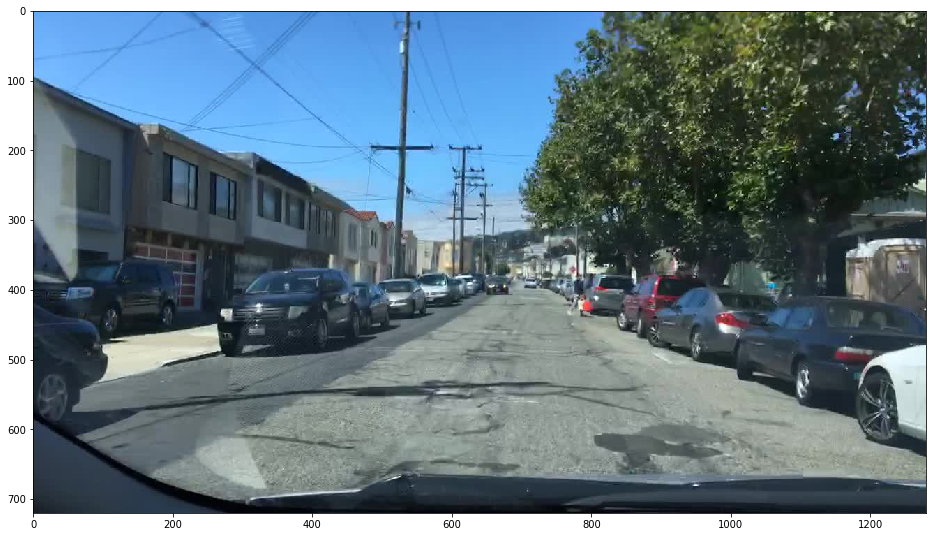

In [26]:
index = randint(0, len(no_peron_names)-1)
print(index)
name = no_peron_names[index][0]
print(name)

xml_path = f"../datasets/bdd100k/xml/train/{name}.xml"
img = cv2.imread(f"../datasets/bdd100k/bdd100k/bdd100k/images/100k/train/{name}.jpg")

person_boxes = []

with open(xml_path, "r") as new_f:
    root = ET.parse(xml_path).getroot()
    for obj in root.findall('object'):
        obj_name = obj.find('name').text
        if obj_name == "person":

            bndbox = obj.find('bndbox')
            left = bndbox.find('xmin').text
            top = bndbox.find('ymin').text
            right = bndbox.find('xmax').text
            bottom = bndbox.find('ymax').text

            person_boxes.append(["person", left, top, right, bottom])

dummy = img.copy()

for box in person_boxes:
    cv2.rectangle(dummy, (int(box[1]), int(box[2])), (int(box[3]), int(box[4])), (0, 255, 0), 2)
        
print("Num of person:", len(person_boxes))

plt.figure(figsize=(16,10))
plt.imshow(rgb_display(dummy))
plt.show()

# Black to Something

In [27]:
contents = file_lines_to_list("./yolo-various-size/60-70/bdd100k_person_60_70_train.txt")
print(len(contents))

1762


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1622
/home/mju-hpc-02/Leanh/mobilenet-ssd/bdd100k/bdd100k/images/100k/train/a4589669-1bed36cf.jpg a4589669-1bed36cf


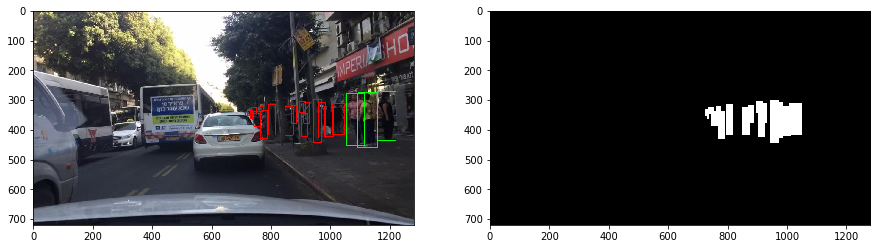

In [43]:
index = randint(0, len(contents)-1)
print(index)
content = contents[index]
path = content[0]
name = get_file_name(path)
print(path, name)

img = cv2.imread(f"../datasets/bdd100k/bdd100k/bdd100k/images/100k/train/{name}.jpg")
xml_path = f"../datasets/bdd100k/xml/train/{name}.xml"

person_boxes = []

with open(xml_path, "r") as new_f:
    root = ET.parse(xml_path).getroot()
    for obj in root.findall('object'):
        obj_name = obj.find('name').text
        if obj_name == "person":

            bndbox = obj.find('bndbox')
            left = bndbox.find('xmin').text
            top = bndbox.find('ymin').text
            right = bndbox.find('xmax').text
            bottom = bndbox.find('ymax').text

            person_boxes.append(["person", left, top, right, bottom])

dummy = img.copy()
mask = np.zeros([720, 1280, 3])

for box in person_boxes:
    if int(box[3])-int(box[1]) >= 50 and int(box[3])-int(box[1]) <= 80 and int(box[4])-int(box[2]) <= 286:
        cv2.rectangle(dummy, (int(box[1]), int(box[2])), (int(box[3]), int(box[4])), (0, 255, 0), 2)

    else:
        cv2.rectangle(mask, (int(box[1]), int(box[2])), (int(box[3]), int(box[4])), (255, 255, 255), -1)
        cv2.rectangle(dummy, (int(box[1]), int(box[2])), (int(box[3]), int(box[4])), (0, 0, 255), 2)
        
        
plt.figure(figsize = (15, 10))
plt.subplot(121), plt.imshow(rgb_display(dummy))
plt.subplot(122), plt.imshow(mask)
plt.show()

In [35]:
# no_peron_names = file_lines_to_list("./yolo-various-size/60-70-enhanced/no_person_img_names.txt")
# print(len(no_peron_names))

1296


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


801
03afe274-da9441b2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


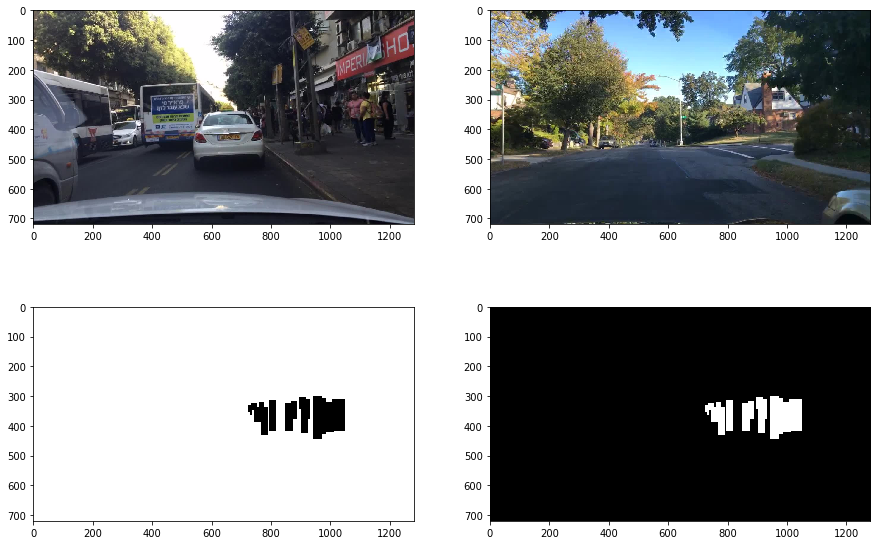

In [44]:
inv_mask = 255 - mask
back_img = img.copy()

index_ = randint(0, len(no_peron_names)-1)
print(index_)
name_ = no_peron_names[index_][0]
print(name_)

fore_img = cv2.imread(f"../datasets/bdd100k/bdd100k/bdd100k/images/100k/train/{name_}.jpg")

plt.figure(figsize = (15, 10))
plt.subplot(221), plt.imshow(rgb_display(back_img))
plt.subplot(222), plt.imshow(rgb_display(fore_img))
plt.subplot(223), plt.imshow(inv_mask)
plt.subplot(224), plt.imshow(mask)
plt.show()

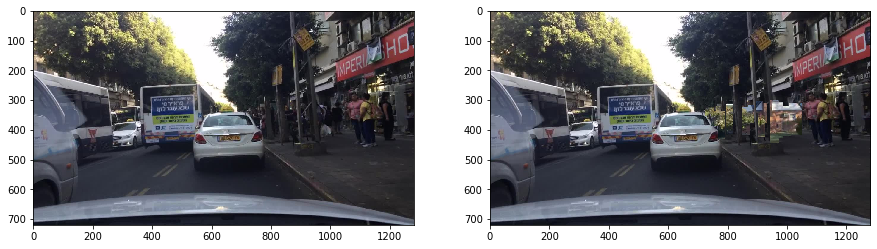

In [45]:
fore_only = (mask/255)*fore_img
back_only = (inv_mask/255.)*back_img
added = fore_only + back_only

added = added.astype(np.uint8)

plt.figure(figsize = (15, 10))
plt.subplot(121), plt.imshow(rgb_display(back_img))
plt.subplot(122), plt.imshow(rgb_display(added))
plt.show()

In [ ]:
# =================== RUN ====================
contents = file_lines_to_list("./yolo-various-size/60-70-enhanced/bdd100k_person_60_70_enhanced_train.txt")

obj_count=0
i=0
temp = 0

for content in contents:
    
    mask = np.zeros([720, 1280, 3])

    path = content[0]
    name = get_file_name(path)[0:17]

    back_img = cv2.imread(f"../datasets/bdd100k/bdd100k/bdd100k/images/100k/train/{name}.jpg")
    
    index_ = randint(0, len(no_peron_names)-1)
    name_ = no_peron_names[index_][0]
    fore_img = cv2.imread(f"../datasets/bdd100k/bdd100k/bdd100k/images/100k/train/{name_}.jpg")

    xml_path = f"../datasets/bdd100k/xml/train/{name}.xml"

    person_boxes = []

    with open(xml_path, "r") as new_f:
        root = ET.parse(xml_path).getroot()
        for obj in root.findall('object'):
            obj_name = obj.find('name').text
            if obj_name == "person":

                bndbox = obj.find('bndbox')
                left = bndbox.find('xmin').text
                top = bndbox.find('ymin').text
                right = bndbox.find('xmax').text
                bottom = bndbox.find('ymax').text

                person_boxes.append(["person", left, top, right, bottom])

    for box in person_boxes:
        if int(box[3])-int(box[1]) >= 50 and int(box[3])-int(box[1]) <= 80 and int(box[4])-int(box[2]) <= 286: temp+=1
        
        else:
            cv2.rectangle(mask, (int(box[1]), int(box[2])), (int(box[3]), int(box[4])), (255, 255, 255), -1)
        
    inv_mask = 255 - mask
    fore_only = (mask/255.)*fore_img
    back_only = (inv_mask/255.)*back_img
    black2sth = fore_only + back_only

    black2sth = black2sth.astype(np.uint8)
    
    cv2.imwrite(f"./yolo-various-size/60-70-enhanced/black2sth/{name}_black2sth.jpg ", black2sth)
    i+=1
    print(i, f"/ {len(contents)}")
    
#     if i == 50: break

1 / 4409
2 / 4409
3 / 4409
4 / 4409
5 / 4409
6 / 4409
7 / 4409
8 / 4409
9 / 4409
10 / 4409
11 / 4409
12 / 4409
13 / 4409
14 / 4409
15 / 4409
16 / 4409
17 / 4409
18 / 4409
19 / 4409
20 / 4409
21 / 4409
22 / 4409
23 / 4409
24 / 4409
25 / 4409
26 / 4409
27 / 4409
28 / 4409
29 / 4409
30 / 4409
31 / 4409
32 / 4409
33 / 4409
34 / 4409
35 / 4409
36 / 4409
37 / 4409
38 / 4409
39 / 4409
40 / 4409
41 / 4409
42 / 4409
43 / 4409
44 / 4409
45 / 4409
46 / 4409
47 / 4409
48 / 4409
49 / 4409
50 / 4409
51 / 4409
52 / 4409
53 / 4409
54 / 4409
55 / 4409
56 / 4409
57 / 4409
58 / 4409
59 / 4409
60 / 4409
61 / 4409
62 / 4409
63 / 4409
64 / 4409
65 / 4409
66 / 4409
67 / 4409
68 / 4409
69 / 4409
70 / 4409
71 / 4409
72 / 4409
73 / 4409
74 / 4409
75 / 4409
76 / 4409
77 / 4409
78 / 4409
79 / 4409
80 / 4409
81 / 4409
82 / 4409
83 / 4409
84 / 4409
85 / 4409
86 / 4409
87 / 4409
88 / 4409
89 / 4409
90 / 4409
91 / 4409
92 / 4409
93 / 4409
94 / 4409
95 / 4409
96 / 4409
97 / 4409
98 / 4409
99 / 4409
100 / 4409
101 / 44

756 / 4409
757 / 4409
758 / 4409
759 / 4409
760 / 4409
761 / 4409
762 / 4409
763 / 4409
764 / 4409
765 / 4409
766 / 4409
767 / 4409
768 / 4409
769 / 4409
770 / 4409
771 / 4409
772 / 4409
773 / 4409
774 / 4409
775 / 4409
776 / 4409
777 / 4409
778 / 4409
779 / 4409
780 / 4409
781 / 4409
782 / 4409
783 / 4409
784 / 4409
785 / 4409
786 / 4409
787 / 4409
788 / 4409
789 / 4409
790 / 4409
791 / 4409
792 / 4409
793 / 4409
794 / 4409
795 / 4409
796 / 4409
797 / 4409
798 / 4409
799 / 4409
800 / 4409
801 / 4409
802 / 4409
803 / 4409
804 / 4409
805 / 4409
806 / 4409
807 / 4409
808 / 4409
809 / 4409
810 / 4409
811 / 4409
812 / 4409
813 / 4409
814 / 4409
815 / 4409
816 / 4409
817 / 4409
818 / 4409
819 / 4409
820 / 4409
821 / 4409
822 / 4409
823 / 4409
824 / 4409
825 / 4409
826 / 4409
827 / 4409
828 / 4409
829 / 4409
830 / 4409
831 / 4409
832 / 4409
833 / 4409
834 / 4409
835 / 4409
836 / 4409
837 / 4409
838 / 4409
839 / 4409
840 / 4409
841 / 4409
842 / 4409
843 / 4409
844 / 4409
845 / 4409
846 / 4409

# Remove Outliers - Ver 2

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from random import randint

In [6]:
contents = file_lines_to_list("./yolo-various-size/60-70/bdd100k_person_60_70_train.txt")

In [7]:
def rgb_display(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

243
/home/mju-hpc-02/Leanh/mobilenet-ssd/bdd100k/bdd100k/images/100k/train/19ed538d-6fcac9d6.jpg 19ed538d-6fcac9d6


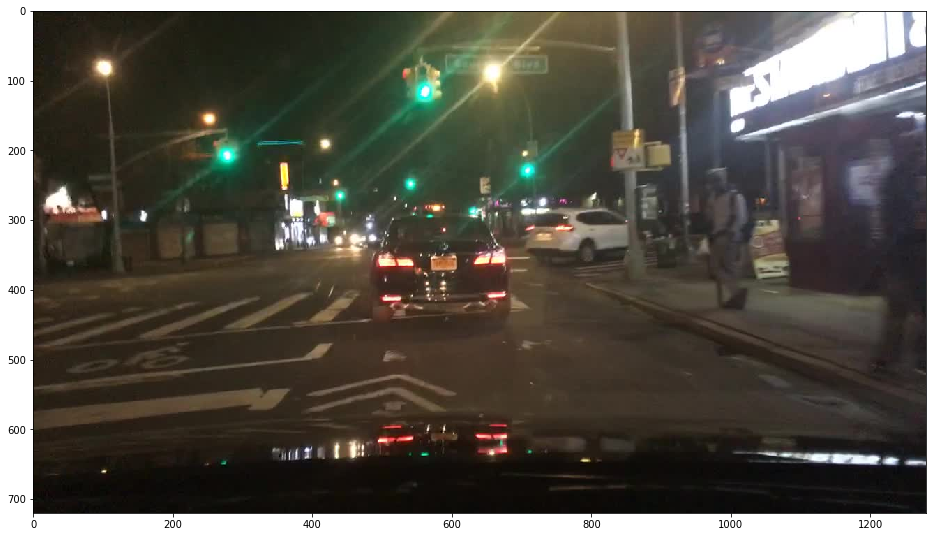

In [10]:
index = randint(0, len(contents)-1)
print(index)
content = contents[index]
path = content[0]
name = get_file_name(path)
print(path, name)

img = cv2.imread(f"../datasets/bdd100k/bdd100k/bdd100k/images/100k/train/{name}.jpg")
plt.figure(figsize=(16,10))
plt.imshow(rgb_display(img))
plt.show()

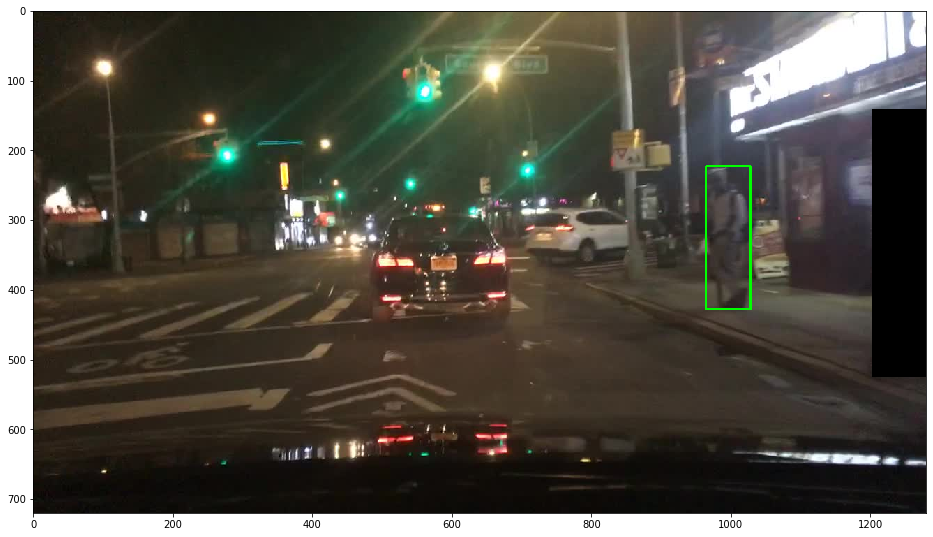

In [11]:
xml_path = f"../datasets/bdd100k/xml/train/{name}.xml"

person_boxes = []

with open(xml_path, "r") as new_f:
    root = ET.parse(xml_path).getroot()
    for obj in root.findall('object'):
        obj_name = obj.find('name').text
        if obj_name == "person":

            bndbox = obj.find('bndbox')
            left = bndbox.find('xmin').text
            top = bndbox.find('ymin').text
            right = bndbox.find('xmax').text
            bottom = bndbox.find('ymax').text

            person_boxes.append(["person", left, top, right, bottom])

dummy = img.copy()

for box in person_boxes:
    if int(box[3])-int(box[1]) >= 50 and int(box[3])-int(box[1]) <= 80 and int(box[4])-int(box[2]) <= 286:
        cv2.rectangle(dummy, (int(box[1]), int(box[2])), (int(box[3]), int(box[4])), (0, 255, 0), 2)

    else:
        cv2.rectangle(dummy, (int(box[1]), int(box[2])), (int(box[3]), int(box[4])), (0, 0, 0), -1)
        
plt.figure(figsize=(16,10))
plt.imshow(rgb_display(dummy))
plt.show()

In [150]:
# cv2.imwrite(f"./yolo-various-size/60-70-enhanced/{name}_outliers_removed.jpg ", dummy)

True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


61
/home/mju-hpc-02/Leanh/mobilenet-ssd/bdd100k/bdd100k/images/100k/train/0857c321-6622ca8c.jpg 0857c321-6622ca8c


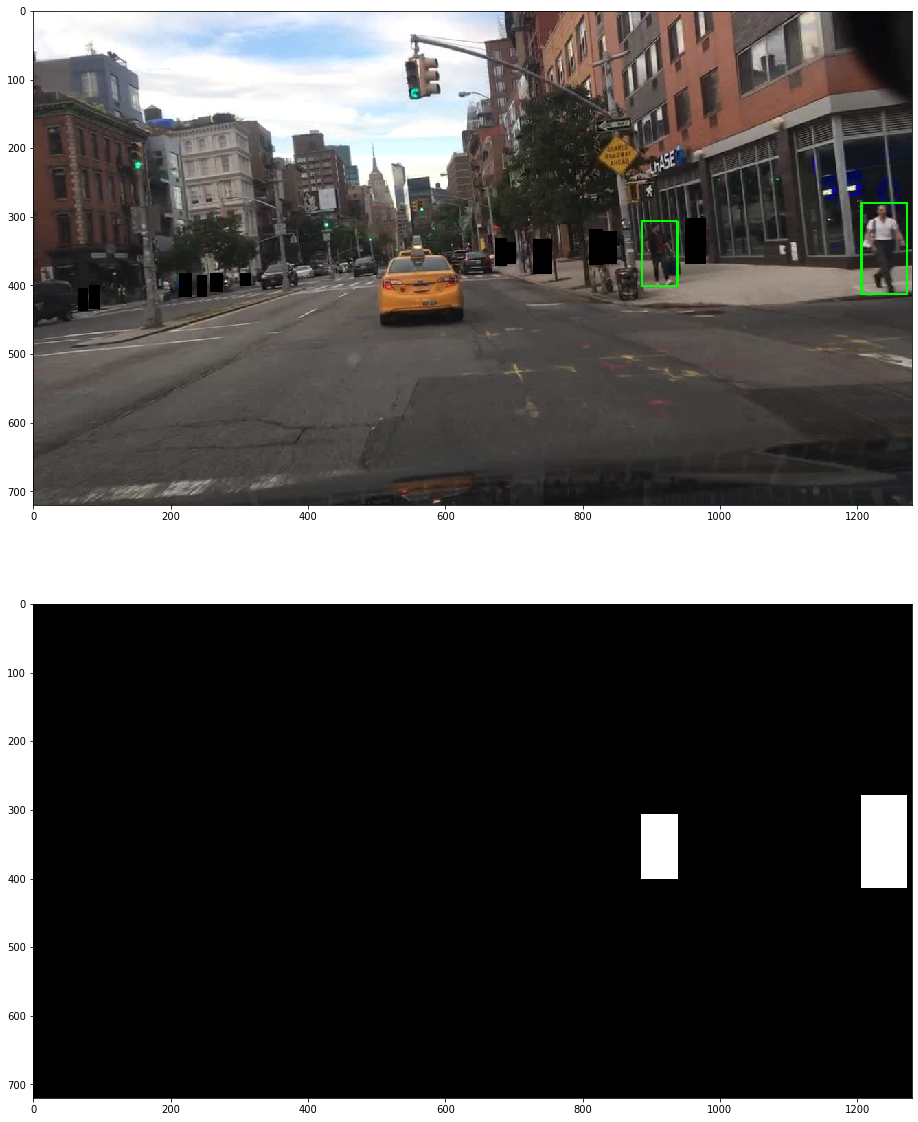

In [122]:
index = randint(0, len(contents)-1)
print(index)

mask = np.zeros([720, 1280, 3])

content = contents[index]
path = content[0]
name = get_file_name(path)
print(path, name)

img = cv2.imread(f"../datasets/bdd100k/bdd100k/bdd100k/images/100k/train/{name}.jpg")

xml_path = f"../datasets/bdd100k/xml/train/{name}.xml"

person_boxes = []

with open(xml_path, "r") as new_f:
    root = ET.parse(xml_path).getroot()
    for obj in root.findall('object'):
        obj_name = obj.find('name').text
        if obj_name == "person":

            bndbox = obj.find('bndbox')
            left = bndbox.find('xmin').text
            top = bndbox.find('ymin').text
            right = bndbox.find('xmax').text
            bottom = bndbox.find('ymax').text

            person_boxes.append(["person", left, top, right, bottom])

dummy = img.copy()

for box in person_boxes:
    if int(box[3])-int(box[1]) >= 50 and int(box[3])-int(box[1]) <= 80 and int(box[4])-int(box[2]) <= 286:
        cv2.rectangle(dummy, (int(box[1]), int(box[2])), (int(box[3]), int(box[4])), (0, 255, 0), 2)
        cv2.rectangle(mask, (int(box[1]), int(box[2])), (int(box[3]), int(box[4])), (255, 255, 255), -1)

    else:
        cv2.rectangle(dummy, (int(box[1]), int(box[2])), (int(box[3]), int(box[4])), (0, 0, 0), -1)

plt.figure(figsize=(18,20))
plt.subplot(211), plt.imshow(rgb_display(dummy))
plt.subplot(212), plt.imshow(mask)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


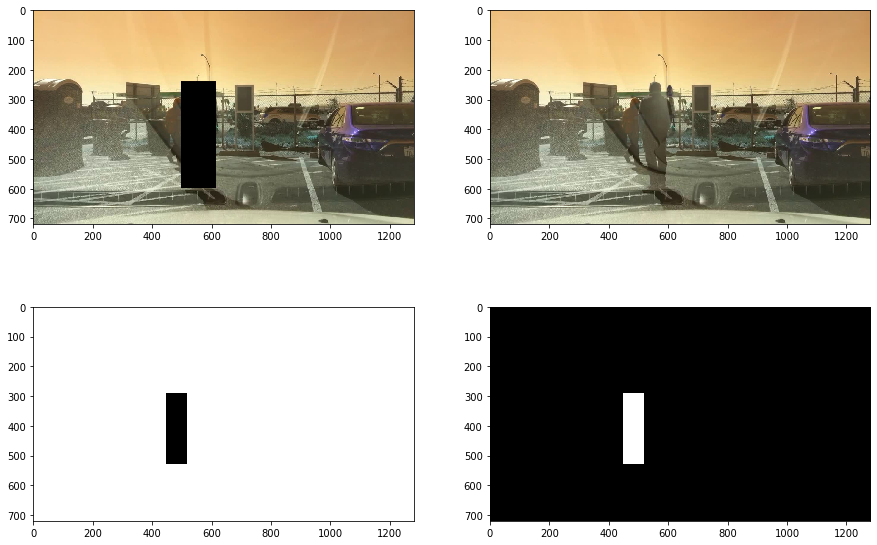

In [119]:
inv_mask = 255 - mask
back_img = cv2.imread(f"./yolo-various-size/60-70-enhanced/train/{name}_outliers_removed.jpg")
fore_img = cv2.imread(f"../datasets/bdd100k/bdd100k/bdd100k/images/100k/train/{name}.jpg")

# fore_only = (mask/255)*fore_img
# back_only = (inv_mask/255)*back_img
# added = fore_only + back_only

# cv2.imwrite("back_only.jpg", back_only)

plt.figure(figsize = (15, 10))
plt.subplot(221), plt.imshow(back_img)
plt.subplot(222), plt.imshow(fore_img)
plt.subplot(223), plt.imshow(inv_mask)
plt.subplot(224), plt.imshow(mask)
plt.show()

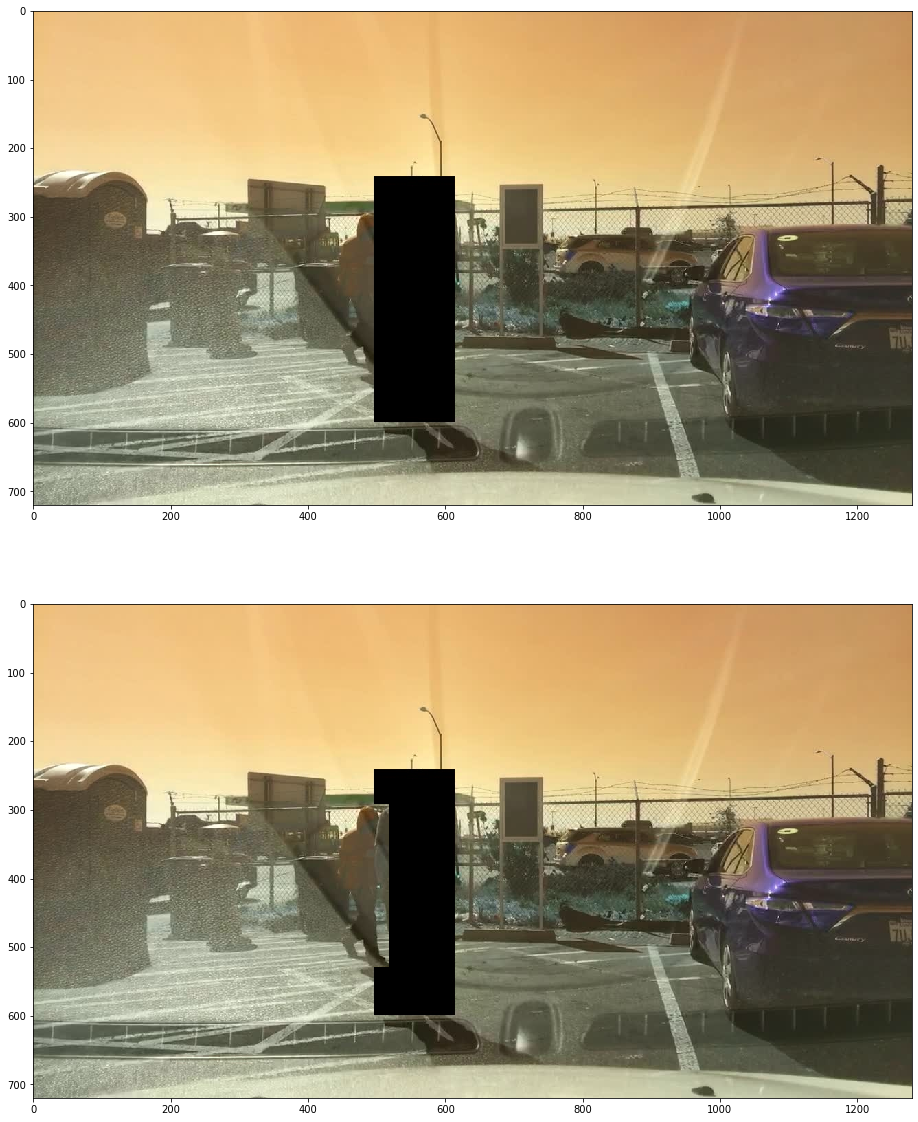

In [120]:
fore_only = (mask/255)*fore_img
back_only = (inv_mask/255.)*back_img
added = fore_only + back_only

added = added.astype(np.uint8)

plt.figure(figsize = (20, 20))
plt.subplot(211), plt.imshow(back_img)
plt.subplot(212), plt.imshow(added)
plt.show()

In [121]:
cv2.imwrite(f"./yolo-various-size/60-70-enhanced/{name}_fault.jpg", dummy)
cv2.imwrite(f"./yolo-various-size/60-70-enhanced/{name}_fixed.jpg", added)

True

In [143]:
# =================== RUN ====================
contents = file_lines_to_list("./yolo-various-size/60-70-enhanced/bdd100k_person_60_70_enhanced_train.txt")

obj_count=0
i=0

for content in contents:
    
    mask = np.zeros([720, 1280, 3])

    path = content[0]
    name = get_file_name(path)[0:17]

    back_img = cv2.imread(f"./yolo-various-size/60-70-enhanced/train/{name}_outliers_removed.jpg")
    fore_img = cv2.imread(f"../datasets/bdd100k/bdd100k/bdd100k/images/100k/train/{name}.jpg")

    xml_path = f"../datasets/bdd100k/xml/train/{name}.xml"

    person_boxes = []

    with open(xml_path, "r") as new_f:
        root = ET.parse(xml_path).getroot()
        for obj in root.findall('object'):
            obj_name = obj.find('name').text
            if obj_name == "person":

                bndbox = obj.find('bndbox')
                left = bndbox.find('xmin').text
                top = bndbox.find('ymin').text
                right = bndbox.find('xmax').text
                bottom = bndbox.find('ymax').text

                person_boxes.append(["person", left, top, right, bottom])

    for box in person_boxes:
        if int(box[3])-int(box[1]) >= 50 and int(box[3])-int(box[1]) <= 80 and int(box[4])-int(box[2]) <= 286:
            cv2.rectangle(mask, (int(box[1]), int(box[2])), (int(box[3]), int(box[4])), (255, 255, 255), -1)  
        
    inv_mask = 255 - mask
    fore_only = (mask/255.)*fore_img
    back_only = (inv_mask/255.)*back_img
    outliers_remove_ver2 = fore_only + back_only

    outliers_remove_ver2 = outliers_remove_ver2.astype(np.uint8)
    
    cv2.imwrite(f"./yolo-various-size/60-70-enhanced/train_ver2/{name}_outliers_removed_ver2.jpg ", outliers_remove_ver2)
    i+=1
    print(i, f"/ {len(contents)}")

1 / 4409
2 / 4409
3 / 4409
4 / 4409
5 / 4409
6 / 4409
7 / 4409
8 / 4409
9 / 4409
10 / 4409
11 / 4409
12 / 4409
13 / 4409
14 / 4409
15 / 4409
16 / 4409
17 / 4409
18 / 4409
19 / 4409
20 / 4409
21 / 4409
22 / 4409
23 / 4409
24 / 4409
25 / 4409
26 / 4409
27 / 4409
28 / 4409
29 / 4409
30 / 4409
31 / 4409
32 / 4409
33 / 4409
34 / 4409
35 / 4409
36 / 4409
37 / 4409
38 / 4409
39 / 4409
40 / 4409
41 / 4409
42 / 4409
43 / 4409
44 / 4409
45 / 4409
46 / 4409
47 / 4409
48 / 4409
49 / 4409
50 / 4409
51 / 4409
52 / 4409
53 / 4409
54 / 4409
55 / 4409
56 / 4409
57 / 4409
58 / 4409
59 / 4409
60 / 4409
61 / 4409
62 / 4409
63 / 4409
64 / 4409
65 / 4409
66 / 4409
67 / 4409
68 / 4409
69 / 4409
70 / 4409
71 / 4409
72 / 4409
73 / 4409
74 / 4409
75 / 4409
76 / 4409
77 / 4409
78 / 4409
79 / 4409
80 / 4409
81 / 4409
82 / 4409
83 / 4409
84 / 4409
85 / 4409
86 / 4409
87 / 4409
88 / 4409
89 / 4409
90 / 4409
91 / 4409
92 / 4409
93 / 4409
94 / 4409
95 / 4409
96 / 4409
97 / 4409
98 / 4409
99 / 4409
100 / 4409
101 / 44

756 / 4409
757 / 4409
758 / 4409
759 / 4409
760 / 4409
761 / 4409
762 / 4409
763 / 4409
764 / 4409
765 / 4409
766 / 4409
767 / 4409
768 / 4409
769 / 4409
770 / 4409
771 / 4409
772 / 4409
773 / 4409
774 / 4409
775 / 4409
776 / 4409
777 / 4409
778 / 4409
779 / 4409
780 / 4409
781 / 4409
782 / 4409
783 / 4409
784 / 4409
785 / 4409
786 / 4409
787 / 4409
788 / 4409
789 / 4409
790 / 4409
791 / 4409
792 / 4409
793 / 4409
794 / 4409
795 / 4409
796 / 4409
797 / 4409
798 / 4409
799 / 4409
800 / 4409
801 / 4409
802 / 4409
803 / 4409
804 / 4409
805 / 4409
806 / 4409
807 / 4409
808 / 4409
809 / 4409
810 / 4409
811 / 4409
812 / 4409
813 / 4409
814 / 4409
815 / 4409
816 / 4409
817 / 4409
818 / 4409
819 / 4409
820 / 4409
821 / 4409
822 / 4409
823 / 4409
824 / 4409
825 / 4409
826 / 4409
827 / 4409
828 / 4409
829 / 4409
830 / 4409
831 / 4409
832 / 4409
833 / 4409
834 / 4409
835 / 4409
836 / 4409
837 / 4409
838 / 4409
839 / 4409
840 / 4409
841 / 4409
842 / 4409
843 / 4409
844 / 4409
845 / 4409
846 / 4409

1460 / 4409
1461 / 4409
1462 / 4409
1463 / 4409
1464 / 4409
1465 / 4409
1466 / 4409
1467 / 4409
1468 / 4409
1469 / 4409
1470 / 4409
1471 / 4409
1472 / 4409
1473 / 4409
1474 / 4409
1475 / 4409
1476 / 4409
1477 / 4409
1478 / 4409
1479 / 4409
1480 / 4409
1481 / 4409
1482 / 4409
1483 / 4409
1484 / 4409
1485 / 4409
1486 / 4409
1487 / 4409
1488 / 4409
1489 / 4409
1490 / 4409
1491 / 4409
1492 / 4409
1493 / 4409
1494 / 4409
1495 / 4409
1496 / 4409
1497 / 4409
1498 / 4409
1499 / 4409
1500 / 4409
1501 / 4409
1502 / 4409
1503 / 4409
1504 / 4409
1505 / 4409
1506 / 4409
1507 / 4409
1508 / 4409
1509 / 4409
1510 / 4409
1511 / 4409
1512 / 4409
1513 / 4409
1514 / 4409
1515 / 4409
1516 / 4409
1517 / 4409
1518 / 4409
1519 / 4409
1520 / 4409
1521 / 4409
1522 / 4409
1523 / 4409
1524 / 4409
1525 / 4409
1526 / 4409
1527 / 4409
1528 / 4409
1529 / 4409
1530 / 4409
1531 / 4409
1532 / 4409
1533 / 4409
1534 / 4409
1535 / 4409
1536 / 4409
1537 / 4409
1538 / 4409
1539 / 4409
1540 / 4409
1541 / 4409
1542 / 4409
1543

2143 / 4409
2144 / 4409
2145 / 4409
2146 / 4409
2147 / 4409
2148 / 4409
2149 / 4409
2150 / 4409
2151 / 4409
2152 / 4409
2153 / 4409
2154 / 4409
2155 / 4409
2156 / 4409
2157 / 4409
2158 / 4409
2159 / 4409
2160 / 4409
2161 / 4409
2162 / 4409
2163 / 4409
2164 / 4409
2165 / 4409
2166 / 4409
2167 / 4409
2168 / 4409
2169 / 4409
2170 / 4409
2171 / 4409
2172 / 4409
2173 / 4409
2174 / 4409
2175 / 4409
2176 / 4409
2177 / 4409
2178 / 4409
2179 / 4409
2180 / 4409
2181 / 4409
2182 / 4409
2183 / 4409
2184 / 4409
2185 / 4409
2186 / 4409
2187 / 4409
2188 / 4409
2189 / 4409
2190 / 4409
2191 / 4409
2192 / 4409
2193 / 4409
2194 / 4409
2195 / 4409
2196 / 4409
2197 / 4409
2198 / 4409
2199 / 4409
2200 / 4409
2201 / 4409
2202 / 4409
2203 / 4409
2204 / 4409
2205 / 4409
2206 / 4409
2207 / 4409
2208 / 4409
2209 / 4409
2210 / 4409
2211 / 4409
2212 / 4409
2213 / 4409
2214 / 4409
2215 / 4409
2216 / 4409
2217 / 4409
2218 / 4409
2219 / 4409
2220 / 4409
2221 / 4409
2222 / 4409
2223 / 4409
2224 / 4409
2225 / 4409
2226

2826 / 4409
2827 / 4409
2828 / 4409
2829 / 4409
2830 / 4409
2831 / 4409
2832 / 4409
2833 / 4409
2834 / 4409
2835 / 4409
2836 / 4409
2837 / 4409
2838 / 4409
2839 / 4409
2840 / 4409
2841 / 4409
2842 / 4409
2843 / 4409
2844 / 4409
2845 / 4409
2846 / 4409
2847 / 4409
2848 / 4409
2849 / 4409
2850 / 4409
2851 / 4409
2852 / 4409
2853 / 4409
2854 / 4409
2855 / 4409
2856 / 4409
2857 / 4409
2858 / 4409
2859 / 4409
2860 / 4409
2861 / 4409
2862 / 4409
2863 / 4409
2864 / 4409
2865 / 4409
2866 / 4409
2867 / 4409
2868 / 4409
2869 / 4409
2870 / 4409
2871 / 4409
2872 / 4409
2873 / 4409
2874 / 4409
2875 / 4409
2876 / 4409
2877 / 4409
2878 / 4409
2879 / 4409
2880 / 4409
2881 / 4409
2882 / 4409
2883 / 4409
2884 / 4409
2885 / 4409
2886 / 4409
2887 / 4409
2888 / 4409
2889 / 4409
2890 / 4409
2891 / 4409
2892 / 4409
2893 / 4409
2894 / 4409
2895 / 4409
2896 / 4409
2897 / 4409
2898 / 4409
2899 / 4409
2900 / 4409
2901 / 4409
2902 / 4409
2903 / 4409
2904 / 4409
2905 / 4409
2906 / 4409
2907 / 4409
2908 / 4409
2909

3509 / 4409
3510 / 4409
3511 / 4409
3512 / 4409
3513 / 4409
3514 / 4409
3515 / 4409
3516 / 4409
3517 / 4409
3518 / 4409
3519 / 4409
3520 / 4409
3521 / 4409
3522 / 4409
3523 / 4409
3524 / 4409
3525 / 4409
3526 / 4409
3527 / 4409
3528 / 4409
3529 / 4409
3530 / 4409
3531 / 4409
3532 / 4409
3533 / 4409
3534 / 4409
3535 / 4409
3536 / 4409
3537 / 4409
3538 / 4409
3539 / 4409
3540 / 4409
3541 / 4409
3542 / 4409
3543 / 4409
3544 / 4409
3545 / 4409
3546 / 4409
3547 / 4409
3548 / 4409
3549 / 4409
3550 / 4409
3551 / 4409
3552 / 4409
3553 / 4409
3554 / 4409
3555 / 4409
3556 / 4409
3557 / 4409
3558 / 4409
3559 / 4409
3560 / 4409
3561 / 4409
3562 / 4409
3563 / 4409
3564 / 4409
3565 / 4409
3566 / 4409
3567 / 4409
3568 / 4409
3569 / 4409
3570 / 4409
3571 / 4409
3572 / 4409
3573 / 4409
3574 / 4409
3575 / 4409
3576 / 4409
3577 / 4409
3578 / 4409
3579 / 4409
3580 / 4409
3581 / 4409
3582 / 4409
3583 / 4409
3584 / 4409
3585 / 4409
3586 / 4409
3587 / 4409
3588 / 4409
3589 / 4409
3590 / 4409
3591 / 4409
3592

4193 / 4409
4194 / 4409
4195 / 4409
4196 / 4409
4197 / 4409
4198 / 4409
4199 / 4409
4200 / 4409
4201 / 4409
4202 / 4409
4203 / 4409
4204 / 4409
4205 / 4409
4206 / 4409
4207 / 4409
4208 / 4409
4209 / 4409
4210 / 4409
4211 / 4409
4212 / 4409
4213 / 4409
4214 / 4409
4215 / 4409
4216 / 4409
4217 / 4409
4218 / 4409
4219 / 4409
4220 / 4409
4221 / 4409
4222 / 4409
4223 / 4409
4224 / 4409
4225 / 4409
4226 / 4409
4227 / 4409
4228 / 4409
4229 / 4409
4230 / 4409
4231 / 4409
4232 / 4409
4233 / 4409
4234 / 4409
4235 / 4409
4236 / 4409
4237 / 4409
4238 / 4409
4239 / 4409
4240 / 4409
4241 / 4409
4242 / 4409
4243 / 4409
4244 / 4409
4245 / 4409
4246 / 4409
4247 / 4409
4248 / 4409
4249 / 4409
4250 / 4409
4251 / 4409
4252 / 4409
4253 / 4409
4254 / 4409
4255 / 4409
4256 / 4409
4257 / 4409
4258 / 4409
4259 / 4409
4260 / 4409
4261 / 4409
4262 / 4409
4263 / 4409
4264 / 4409
4265 / 4409
4266 / 4409
4267 / 4409
4268 / 4409
4269 / 4409
4270 / 4409
4271 / 4409
4272 / 4409
4273 / 4409
4274 / 4409
4275 / 4409
4276

# Gen TXT GT (ignore 25% top)

In [5]:
# Generate Validation Annotations TXT 
xml_src = glob.glob("../datasets/bdd100k/xml/val/*.xml")

i=0
for xml_path in xml_src:
    i+=1
    person_boxes = []
    small_widths = []

    with open(xml_path, "r") as new_f:
        root = ET.parse(xml_path).getroot()
        for obj in root.findall('object'):
            obj_name = obj.find('name').text
            if obj_name == "person":

                bndbox = obj.find('bndbox')
                left = bndbox.find('xmin').text
                top = bndbox.find('ymin').text
                right = bndbox.find('xmax').text
                bottom = bndbox.find('ymax').text

                person_boxes.append([left, top, right, bottom])
                
#                 if int(bottom) >= 0:
#                     small_widths.append(int(bottom))

#     if len(person_boxes) > 0 and len(small_widths) > 0:
    if len(person_boxes) > 0:
        img_basename = os.path.basename(xml_path)
        img_onlyname = os.path.splitext(img_basename)
        
        # Create and write out a text file:
        text_file = open("./bdd100k_person_GT/" + img_onlyname[0] + ".txt", "w+")

        for box in person_boxes:
#             if int(bottom) >= 180:
            print("person", box[0], box[1], box[2], box[3], file=text_file)                     
        text_file.close()
        
    print(i, "/ 10000")

1 / 10000
2 / 10000
3 / 10000
4 / 10000
5 / 10000
6 / 10000
7 / 10000
8 / 10000
9 / 10000
10 / 10000
11 / 10000
12 / 10000
13 / 10000
14 / 10000
15 / 10000
16 / 10000
17 / 10000
18 / 10000
19 / 10000
20 / 10000
21 / 10000
22 / 10000
23 / 10000
24 / 10000
25 / 10000
26 / 10000
27 / 10000
28 / 10000
29 / 10000
30 / 10000
31 / 10000
32 / 10000
33 / 10000
34 / 10000
35 / 10000
36 / 10000
37 / 10000
38 / 10000
39 / 10000
40 / 10000
41 / 10000
42 / 10000
43 / 10000
44 / 10000
45 / 10000
46 / 10000
47 / 10000
48 / 10000
49 / 10000
50 / 10000
51 / 10000
52 / 10000
53 / 10000
54 / 10000
55 / 10000
56 / 10000
57 / 10000
58 / 10000
59 / 10000
60 / 10000
61 / 10000
62 / 10000
63 / 10000
64 / 10000
65 / 10000
66 / 10000
67 / 10000
68 / 10000
69 / 10000
70 / 10000
71 / 10000
72 / 10000
73 / 10000
74 / 10000
75 / 10000
76 / 10000
77 / 10000
78 / 10000
79 / 10000
80 / 10000
81 / 10000
82 / 10000
83 / 10000
84 / 10000
85 / 10000
86 / 10000
87 / 10000
88 / 10000
89 / 10000
90 / 10000
91 / 10000
92 / 100

717 / 10000
718 / 10000
719 / 10000
720 / 10000
721 / 10000
722 / 10000
723 / 10000
724 / 10000
725 / 10000
726 / 10000
727 / 10000
728 / 10000
729 / 10000
730 / 10000
731 / 10000
732 / 10000
733 / 10000
734 / 10000
735 / 10000
736 / 10000
737 / 10000
738 / 10000
739 / 10000
740 / 10000
741 / 10000
742 / 10000
743 / 10000
744 / 10000
745 / 10000
746 / 10000
747 / 10000
748 / 10000
749 / 10000
750 / 10000
751 / 10000
752 / 10000
753 / 10000
754 / 10000
755 / 10000
756 / 10000
757 / 10000
758 / 10000
759 / 10000
760 / 10000
761 / 10000
762 / 10000
763 / 10000
764 / 10000
765 / 10000
766 / 10000
767 / 10000
768 / 10000
769 / 10000
770 / 10000
771 / 10000
772 / 10000
773 / 10000
774 / 10000
775 / 10000
776 / 10000
777 / 10000
778 / 10000
779 / 10000
780 / 10000
781 / 10000
782 / 10000
783 / 10000
784 / 10000
785 / 10000
786 / 10000
787 / 10000
788 / 10000
789 / 10000
790 / 10000
791 / 10000
792 / 10000
793 / 10000
794 / 10000
795 / 10000
796 / 10000
797 / 10000
798 / 10000
799 / 10000
800 

1394 / 10000
1395 / 10000
1396 / 10000
1397 / 10000
1398 / 10000
1399 / 10000
1400 / 10000
1401 / 10000
1402 / 10000
1403 / 10000
1404 / 10000
1405 / 10000
1406 / 10000
1407 / 10000
1408 / 10000
1409 / 10000
1410 / 10000
1411 / 10000
1412 / 10000
1413 / 10000
1414 / 10000
1415 / 10000
1416 / 10000
1417 / 10000
1418 / 10000
1419 / 10000
1420 / 10000
1421 / 10000
1422 / 10000
1423 / 10000
1424 / 10000
1425 / 10000
1426 / 10000
1427 / 10000
1428 / 10000
1429 / 10000
1430 / 10000
1431 / 10000
1432 / 10000
1433 / 10000
1434 / 10000
1435 / 10000
1436 / 10000
1437 / 10000
1438 / 10000
1439 / 10000
1440 / 10000
1441 / 10000
1442 / 10000
1443 / 10000
1444 / 10000
1445 / 10000
1446 / 10000
1447 / 10000
1448 / 10000
1449 / 10000
1450 / 10000
1451 / 10000
1452 / 10000
1453 / 10000
1454 / 10000
1455 / 10000
1456 / 10000
1457 / 10000
1458 / 10000
1459 / 10000
1460 / 10000
1461 / 10000
1462 / 10000
1463 / 10000
1464 / 10000
1465 / 10000
1466 / 10000
1467 / 10000
1468 / 10000
1469 / 10000
1470 / 10000

2027 / 10000
2028 / 10000
2029 / 10000
2030 / 10000
2031 / 10000
2032 / 10000
2033 / 10000
2034 / 10000
2035 / 10000
2036 / 10000
2037 / 10000
2038 / 10000
2039 / 10000
2040 / 10000
2041 / 10000
2042 / 10000
2043 / 10000
2044 / 10000
2045 / 10000
2046 / 10000
2047 / 10000
2048 / 10000
2049 / 10000
2050 / 10000
2051 / 10000
2052 / 10000
2053 / 10000
2054 / 10000
2055 / 10000
2056 / 10000
2057 / 10000
2058 / 10000
2059 / 10000
2060 / 10000
2061 / 10000
2062 / 10000
2063 / 10000
2064 / 10000
2065 / 10000
2066 / 10000
2067 / 10000
2068 / 10000
2069 / 10000
2070 / 10000
2071 / 10000
2072 / 10000
2073 / 10000
2074 / 10000
2075 / 10000
2076 / 10000
2077 / 10000
2078 / 10000
2079 / 10000
2080 / 10000
2081 / 10000
2082 / 10000
2083 / 10000
2084 / 10000
2085 / 10000
2086 / 10000
2087 / 10000
2088 / 10000
2089 / 10000
2090 / 10000
2091 / 10000
2092 / 10000
2093 / 10000
2094 / 10000
2095 / 10000
2096 / 10000
2097 / 10000
2098 / 10000
2099 / 10000
2100 / 10000
2101 / 10000
2102 / 10000
2103 / 10000

2668 / 10000
2669 / 10000
2670 / 10000
2671 / 10000
2672 / 10000
2673 / 10000
2674 / 10000
2675 / 10000
2676 / 10000
2677 / 10000
2678 / 10000
2679 / 10000
2680 / 10000
2681 / 10000
2682 / 10000
2683 / 10000
2684 / 10000
2685 / 10000
2686 / 10000
2687 / 10000
2688 / 10000
2689 / 10000
2690 / 10000
2691 / 10000
2692 / 10000
2693 / 10000
2694 / 10000
2695 / 10000
2696 / 10000
2697 / 10000
2698 / 10000
2699 / 10000
2700 / 10000
2701 / 10000
2702 / 10000
2703 / 10000
2704 / 10000
2705 / 10000
2706 / 10000
2707 / 10000
2708 / 10000
2709 / 10000
2710 / 10000
2711 / 10000
2712 / 10000
2713 / 10000
2714 / 10000
2715 / 10000
2716 / 10000
2717 / 10000
2718 / 10000
2719 / 10000
2720 / 10000
2721 / 10000
2722 / 10000
2723 / 10000
2724 / 10000
2725 / 10000
2726 / 10000
2727 / 10000
2728 / 10000
2729 / 10000
2730 / 10000
2731 / 10000
2732 / 10000
2733 / 10000
2734 / 10000
2735 / 10000
2736 / 10000
2737 / 10000
2738 / 10000
2739 / 10000
2740 / 10000
2741 / 10000
2742 / 10000
2743 / 10000
2744 / 10000

3300 / 10000
3301 / 10000
3302 / 10000
3303 / 10000
3304 / 10000
3305 / 10000
3306 / 10000
3307 / 10000
3308 / 10000
3309 / 10000
3310 / 10000
3311 / 10000
3312 / 10000
3313 / 10000
3314 / 10000
3315 / 10000
3316 / 10000
3317 / 10000
3318 / 10000
3319 / 10000
3320 / 10000
3321 / 10000
3322 / 10000
3323 / 10000
3324 / 10000
3325 / 10000
3326 / 10000
3327 / 10000
3328 / 10000
3329 / 10000
3330 / 10000
3331 / 10000
3332 / 10000
3333 / 10000
3334 / 10000
3335 / 10000
3336 / 10000
3337 / 10000
3338 / 10000
3339 / 10000
3340 / 10000
3341 / 10000
3342 / 10000
3343 / 10000
3344 / 10000
3345 / 10000
3346 / 10000
3347 / 10000
3348 / 10000
3349 / 10000
3350 / 10000
3351 / 10000
3352 / 10000
3353 / 10000
3354 / 10000
3355 / 10000
3356 / 10000
3357 / 10000
3358 / 10000
3359 / 10000
3360 / 10000
3361 / 10000
3362 / 10000
3363 / 10000
3364 / 10000
3365 / 10000
3366 / 10000
3367 / 10000
3368 / 10000
3369 / 10000
3370 / 10000
3371 / 10000
3372 / 10000
3373 / 10000
3374 / 10000
3375 / 10000
3376 / 10000

3941 / 10000
3942 / 10000
3943 / 10000
3944 / 10000
3945 / 10000
3946 / 10000
3947 / 10000
3948 / 10000
3949 / 10000
3950 / 10000
3951 / 10000
3952 / 10000
3953 / 10000
3954 / 10000
3955 / 10000
3956 / 10000
3957 / 10000
3958 / 10000
3959 / 10000
3960 / 10000
3961 / 10000
3962 / 10000
3963 / 10000
3964 / 10000
3965 / 10000
3966 / 10000
3967 / 10000
3968 / 10000
3969 / 10000
3970 / 10000
3971 / 10000
3972 / 10000
3973 / 10000
3974 / 10000
3975 / 10000
3976 / 10000
3977 / 10000
3978 / 10000
3979 / 10000
3980 / 10000
3981 / 10000
3982 / 10000
3983 / 10000
3984 / 10000
3985 / 10000
3986 / 10000
3987 / 10000
3988 / 10000
3989 / 10000
3990 / 10000
3991 / 10000
3992 / 10000
3993 / 10000
3994 / 10000
3995 / 10000
3996 / 10000
3997 / 10000
3998 / 10000
3999 / 10000
4000 / 10000
4001 / 10000
4002 / 10000
4003 / 10000
4004 / 10000
4005 / 10000
4006 / 10000
4007 / 10000
4008 / 10000
4009 / 10000
4010 / 10000
4011 / 10000
4012 / 10000
4013 / 10000
4014 / 10000
4015 / 10000
4016 / 10000
4017 / 10000

4574 / 10000
4575 / 10000
4576 / 10000
4577 / 10000
4578 / 10000
4579 / 10000
4580 / 10000
4581 / 10000
4582 / 10000
4583 / 10000
4584 / 10000
4585 / 10000
4586 / 10000
4587 / 10000
4588 / 10000
4589 / 10000
4590 / 10000
4591 / 10000
4592 / 10000
4593 / 10000
4594 / 10000
4595 / 10000
4596 / 10000
4597 / 10000
4598 / 10000
4599 / 10000
4600 / 10000
4601 / 10000
4602 / 10000
4603 / 10000
4604 / 10000
4605 / 10000
4606 / 10000
4607 / 10000
4608 / 10000
4609 / 10000
4610 / 10000
4611 / 10000
4612 / 10000
4613 / 10000
4614 / 10000
4615 / 10000
4616 / 10000
4617 / 10000
4618 / 10000
4619 / 10000
4620 / 10000
4621 / 10000
4622 / 10000
4623 / 10000
4624 / 10000
4625 / 10000
4626 / 10000
4627 / 10000
4628 / 10000
4629 / 10000
4630 / 10000
4631 / 10000
4632 / 10000
4633 / 10000
4634 / 10000
4635 / 10000
4636 / 10000
4637 / 10000
4638 / 10000
4639 / 10000
4640 / 10000
4641 / 10000
4642 / 10000
4643 / 10000
4644 / 10000
4645 / 10000
4646 / 10000
4647 / 10000
4648 / 10000
4649 / 10000
4650 / 10000

5231 / 10000
5232 / 10000
5233 / 10000
5234 / 10000
5235 / 10000
5236 / 10000
5237 / 10000
5238 / 10000
5239 / 10000
5240 / 10000
5241 / 10000
5242 / 10000
5243 / 10000
5244 / 10000
5245 / 10000
5246 / 10000
5247 / 10000
5248 / 10000
5249 / 10000
5250 / 10000
5251 / 10000
5252 / 10000
5253 / 10000
5254 / 10000
5255 / 10000
5256 / 10000
5257 / 10000
5258 / 10000
5259 / 10000
5260 / 10000
5261 / 10000
5262 / 10000
5263 / 10000
5264 / 10000
5265 / 10000
5266 / 10000
5267 / 10000
5268 / 10000
5269 / 10000
5270 / 10000
5271 / 10000
5272 / 10000
5273 / 10000
5274 / 10000
5275 / 10000
5276 / 10000
5277 / 10000
5278 / 10000
5279 / 10000
5280 / 10000
5281 / 10000
5282 / 10000
5283 / 10000
5284 / 10000
5285 / 10000
5286 / 10000
5287 / 10000
5288 / 10000
5289 / 10000
5290 / 10000
5291 / 10000
5292 / 10000
5293 / 10000
5294 / 10000
5295 / 10000
5296 / 10000
5297 / 10000
5298 / 10000
5299 / 10000
5300 / 10000
5301 / 10000
5302 / 10000
5303 / 10000
5304 / 10000
5305 / 10000
5306 / 10000
5307 / 10000

5872 / 10000
5873 / 10000
5874 / 10000
5875 / 10000
5876 / 10000
5877 / 10000
5878 / 10000
5879 / 10000
5880 / 10000
5881 / 10000
5882 / 10000
5883 / 10000
5884 / 10000
5885 / 10000
5886 / 10000
5887 / 10000
5888 / 10000
5889 / 10000
5890 / 10000
5891 / 10000
5892 / 10000
5893 / 10000
5894 / 10000
5895 / 10000
5896 / 10000
5897 / 10000
5898 / 10000
5899 / 10000
5900 / 10000
5901 / 10000
5902 / 10000
5903 / 10000
5904 / 10000
5905 / 10000
5906 / 10000
5907 / 10000
5908 / 10000
5909 / 10000
5910 / 10000
5911 / 10000
5912 / 10000
5913 / 10000
5914 / 10000
5915 / 10000
5916 / 10000
5917 / 10000
5918 / 10000
5919 / 10000
5920 / 10000
5921 / 10000
5922 / 10000
5923 / 10000
5924 / 10000
5925 / 10000
5926 / 10000
5927 / 10000
5928 / 10000
5929 / 10000
5930 / 10000
5931 / 10000
5932 / 10000
5933 / 10000
5934 / 10000
5935 / 10000
5936 / 10000
5937 / 10000
5938 / 10000
5939 / 10000
5940 / 10000
5941 / 10000
5942 / 10000
5943 / 10000
5944 / 10000
5945 / 10000
5946 / 10000
5947 / 10000
5948 / 10000

6513 / 10000
6514 / 10000
6515 / 10000
6516 / 10000
6517 / 10000
6518 / 10000
6519 / 10000
6520 / 10000
6521 / 10000
6522 / 10000
6523 / 10000
6524 / 10000
6525 / 10000
6526 / 10000
6527 / 10000
6528 / 10000
6529 / 10000
6530 / 10000
6531 / 10000
6532 / 10000
6533 / 10000
6534 / 10000
6535 / 10000
6536 / 10000
6537 / 10000
6538 / 10000
6539 / 10000
6540 / 10000
6541 / 10000
6542 / 10000
6543 / 10000
6544 / 10000
6545 / 10000
6546 / 10000
6547 / 10000
6548 / 10000
6549 / 10000
6550 / 10000
6551 / 10000
6552 / 10000
6553 / 10000
6554 / 10000
6555 / 10000
6556 / 10000
6557 / 10000
6558 / 10000
6559 / 10000
6560 / 10000
6561 / 10000
6562 / 10000
6563 / 10000
6564 / 10000
6565 / 10000
6566 / 10000
6567 / 10000
6568 / 10000
6569 / 10000
6570 / 10000
6571 / 10000
6572 / 10000
6573 / 10000
6574 / 10000
6575 / 10000
6576 / 10000
6577 / 10000
6578 / 10000
6579 / 10000
6580 / 10000
6581 / 10000
6582 / 10000
6583 / 10000
6584 / 10000
6585 / 10000
6586 / 10000
6587 / 10000
6588 / 10000
6589 / 10000

7147 / 10000
7148 / 10000
7149 / 10000
7150 / 10000
7151 / 10000
7152 / 10000
7153 / 10000
7154 / 10000
7155 / 10000
7156 / 10000
7157 / 10000
7158 / 10000
7159 / 10000
7160 / 10000
7161 / 10000
7162 / 10000
7163 / 10000
7164 / 10000
7165 / 10000
7166 / 10000
7167 / 10000
7168 / 10000
7169 / 10000
7170 / 10000
7171 / 10000
7172 / 10000
7173 / 10000
7174 / 10000
7175 / 10000
7176 / 10000
7177 / 10000
7178 / 10000
7179 / 10000
7180 / 10000
7181 / 10000
7182 / 10000
7183 / 10000
7184 / 10000
7185 / 10000
7186 / 10000
7187 / 10000
7188 / 10000
7189 / 10000
7190 / 10000
7191 / 10000
7192 / 10000
7193 / 10000
7194 / 10000
7195 / 10000
7196 / 10000
7197 / 10000
7198 / 10000
7199 / 10000
7200 / 10000
7201 / 10000
7202 / 10000
7203 / 10000
7204 / 10000
7205 / 10000
7206 / 10000
7207 / 10000
7208 / 10000
7209 / 10000
7210 / 10000
7211 / 10000
7212 / 10000
7213 / 10000
7214 / 10000
7215 / 10000
7216 / 10000
7217 / 10000
7218 / 10000
7219 / 10000
7220 / 10000
7221 / 10000
7222 / 10000
7223 / 10000

7801 / 10000
7802 / 10000
7803 / 10000
7804 / 10000
7805 / 10000
7806 / 10000
7807 / 10000
7808 / 10000
7809 / 10000
7810 / 10000
7811 / 10000
7812 / 10000
7813 / 10000
7814 / 10000
7815 / 10000
7816 / 10000
7817 / 10000
7818 / 10000
7819 / 10000
7820 / 10000
7821 / 10000
7822 / 10000
7823 / 10000
7824 / 10000
7825 / 10000
7826 / 10000
7827 / 10000
7828 / 10000
7829 / 10000
7830 / 10000
7831 / 10000
7832 / 10000
7833 / 10000
7834 / 10000
7835 / 10000
7836 / 10000
7837 / 10000
7838 / 10000
7839 / 10000
7840 / 10000
7841 / 10000
7842 / 10000
7843 / 10000
7844 / 10000
7845 / 10000
7846 / 10000
7847 / 10000
7848 / 10000
7849 / 10000
7850 / 10000
7851 / 10000
7852 / 10000
7853 / 10000
7854 / 10000
7855 / 10000
7856 / 10000
7857 / 10000
7858 / 10000
7859 / 10000
7860 / 10000
7861 / 10000
7862 / 10000
7863 / 10000
7864 / 10000
7865 / 10000
7866 / 10000
7867 / 10000
7868 / 10000
7869 / 10000
7870 / 10000
7871 / 10000
7872 / 10000
7873 / 10000
7874 / 10000
7875 / 10000
7876 / 10000
7877 / 10000

8435 / 10000
8436 / 10000
8437 / 10000
8438 / 10000
8439 / 10000
8440 / 10000
8441 / 10000
8442 / 10000
8443 / 10000
8444 / 10000
8445 / 10000
8446 / 10000
8447 / 10000
8448 / 10000
8449 / 10000
8450 / 10000
8451 / 10000
8452 / 10000
8453 / 10000
8454 / 10000
8455 / 10000
8456 / 10000
8457 / 10000
8458 / 10000
8459 / 10000
8460 / 10000
8461 / 10000
8462 / 10000
8463 / 10000
8464 / 10000
8465 / 10000
8466 / 10000
8467 / 10000
8468 / 10000
8469 / 10000
8470 / 10000
8471 / 10000
8472 / 10000
8473 / 10000
8474 / 10000
8475 / 10000
8476 / 10000
8477 / 10000
8478 / 10000
8479 / 10000
8480 / 10000
8481 / 10000
8482 / 10000
8483 / 10000
8484 / 10000
8485 / 10000
8486 / 10000
8487 / 10000
8488 / 10000
8489 / 10000
8490 / 10000
8491 / 10000
8492 / 10000
8493 / 10000
8494 / 10000
8495 / 10000
8496 / 10000
8497 / 10000
8498 / 10000
8499 / 10000
8500 / 10000
8501 / 10000
8502 / 10000
8503 / 10000
8504 / 10000
8505 / 10000
8506 / 10000
8507 / 10000
8508 / 10000
8509 / 10000
8510 / 10000
8511 / 10000

9080 / 10000
9081 / 10000
9082 / 10000
9083 / 10000
9084 / 10000
9085 / 10000
9086 / 10000
9087 / 10000
9088 / 10000
9089 / 10000
9090 / 10000
9091 / 10000
9092 / 10000
9093 / 10000
9094 / 10000
9095 / 10000
9096 / 10000
9097 / 10000
9098 / 10000
9099 / 10000
9100 / 10000
9101 / 10000
9102 / 10000
9103 / 10000
9104 / 10000
9105 / 10000
9106 / 10000
9107 / 10000
9108 / 10000
9109 / 10000
9110 / 10000
9111 / 10000
9112 / 10000
9113 / 10000
9114 / 10000
9115 / 10000
9116 / 10000
9117 / 10000
9118 / 10000
9119 / 10000
9120 / 10000
9121 / 10000
9122 / 10000
9123 / 10000
9124 / 10000
9125 / 10000
9126 / 10000
9127 / 10000
9128 / 10000
9129 / 10000
9130 / 10000
9131 / 10000
9132 / 10000
9133 / 10000
9134 / 10000
9135 / 10000
9136 / 10000
9137 / 10000
9138 / 10000
9139 / 10000
9140 / 10000
9141 / 10000
9142 / 10000
9143 / 10000
9144 / 10000
9145 / 10000
9146 / 10000
9147 / 10000
9148 / 10000
9149 / 10000
9150 / 10000
9151 / 10000
9152 / 10000
9153 / 10000
9154 / 10000
9155 / 10000
9156 / 10000

9716 / 10000
9717 / 10000
9718 / 10000
9719 / 10000
9720 / 10000
9721 / 10000
9722 / 10000
9723 / 10000
9724 / 10000
9725 / 10000
9726 / 10000
9727 / 10000
9728 / 10000
9729 / 10000
9730 / 10000
9731 / 10000
9732 / 10000
9733 / 10000
9734 / 10000
9735 / 10000
9736 / 10000
9737 / 10000
9738 / 10000
9739 / 10000
9740 / 10000
9741 / 10000
9742 / 10000
9743 / 10000
9744 / 10000
9745 / 10000
9746 / 10000
9747 / 10000
9748 / 10000
9749 / 10000
9750 / 10000
9751 / 10000
9752 / 10000
9753 / 10000
9754 / 10000
9755 / 10000
9756 / 10000
9757 / 10000
9758 / 10000
9759 / 10000
9760 / 10000
9761 / 10000
9762 / 10000
9763 / 10000
9764 / 10000
9765 / 10000
9766 / 10000
9767 / 10000
9768 / 10000
9769 / 10000
9770 / 10000
9771 / 10000
9772 / 10000
9773 / 10000
9774 / 10000
9775 / 10000
9776 / 10000
9777 / 10000
9778 / 10000
9779 / 10000
9780 / 10000
9781 / 10000
9782 / 10000
9783 / 10000
9784 / 10000
9785 / 10000
9786 / 10000
9787 / 10000
9788 / 10000
9789 / 10000
9790 / 10000
9791 / 10000
9792 / 10000